In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ours_spectral import OurSpectral

n_samples = 1000
n_basis = 3
delta = 1e-5

ours_spectral = OurSpectral(basis='Legendre', n_basis=n_basis)

grad_ours_MC, grad_finite_diff = ours_spectral.demo_finite_diff(
    n_samples=n_samples, delta=delta, is_MC=True)

grad_ours_integrate, grad_finite_diff = ours_spectral.demo_finite_diff(
    n_samples=n_samples, delta=delta, is_MC=False)

print("basis: ", ours_spectral.basis)
print("n_samples: ", n_samples)
print("finite difference: ")
print(grad_finite_diff)
print("ours MC: ")
print(grad_ours_MC.mean(0))
print("ours integration: ")
print(grad_ours_integrate.mean(0))

a = grad_ours_integrate.mean(0)
b = grad_finite_diff

norm = lambda x: np.sqrt((x**2).sum(1))
cos_value = (a * b).sum(1) / norm(a) / norm(b)
angles = np.arccos(cos_value)
ours_over_FD = norm(a) / norm(b)
print("angles: ", angles)
print("ours_over_FD: ", ours_over_FD)


basis:  Legendre
n_samples:  1000
finite difference: 
[[ 0.26081988  0.17041945 -0.02302575]
 [-0.63937363 -0.17042685  0.02301845]]
ours MC: 
[[ 0.21357272  0.14054985 -0.01532661]
 [-0.51601907 -0.14443841  0.0141568 ]]
ours integration: 
[[ 0.2086199   0.13601981 -0.01836817]
 [-0.51106513 -0.13603562  0.01866681]]
angles:  [0.00099097 0.00061599]
ours_over_FD:  [0.79934046 0.79926181]


In [74]:
i_Hs = 1
i_Basis = 1
print(grad_ours_integrate[:, i_Hs, i_Basis].std(), grad_ours_integrate[:, i_Hs, i_Basis].mean())
print(grad_ours_MC[:, i_Hs, i_Basis].std(), grad_ours_MC[:, i_Hs, i_Basis].mean())
# plt.plot(grad_ours_integrate[i_Hs])
print(grad_ours_integrate.shape)
print(grad_ours_MC.shape)

0.29865747341056914 -0.13603561809758424
0.3028177119448835 -0.14443840976631436
(1000, 2, 3)
(1000, 2, 3)


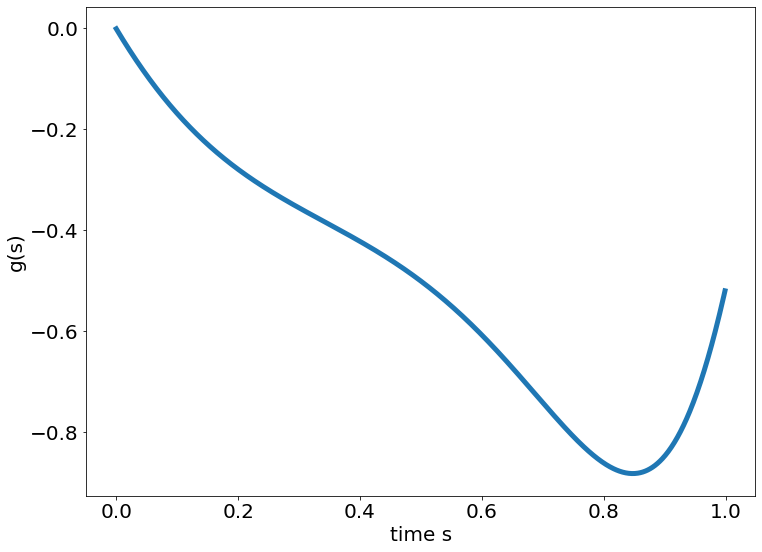

In [80]:
i_Hs = 1
i_Basis = 0
xx = np.arange(grad_ours_integrate[:, i_Hs, i_Basis].shape[0])
xx = xx / xx.shape[0]
plt.plot(xx, grad_ours_integrate[:, i_Hs, i_Basis],linewidth=5)

plt.ylabel('g(s)')
plt.xlabel('time s')

params = {'legend.fontsize': 25,
          'figure.figsize': (12, 9),
         'axes.labelsize': 25,
         'axes.titlesize': 25,
         'xtick.labelsize':25,
         'ytick.labelsize':25}
plt.savefig("{}curve_{}.png".format('./logs/', 'curve_gs{}_{}'.format(i_Hs, i_Basis)))

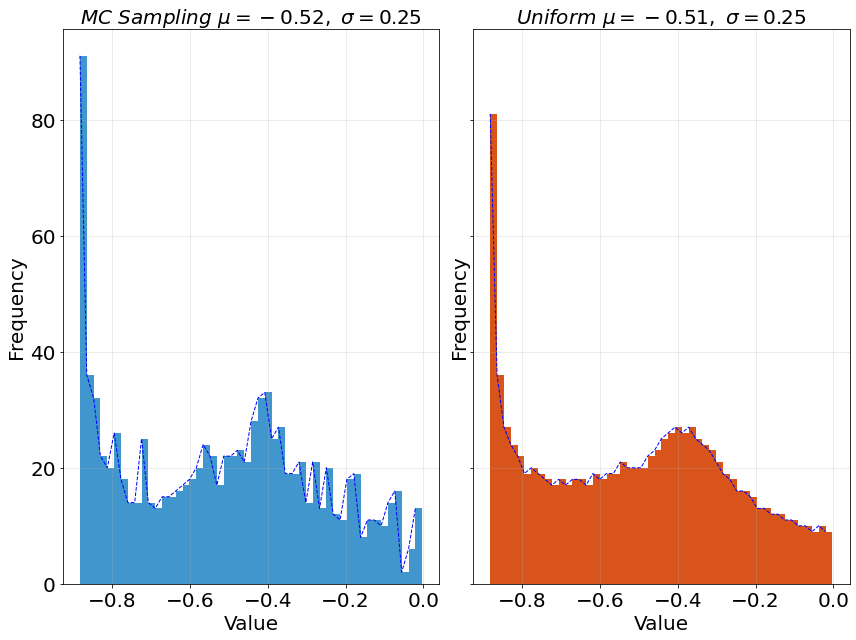

In [78]:
i_Hs = 1
i_Basis = 0

n_bins = 50

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

colors = [
    [0, 0.45, 0.74],
    [0.85, 0.33, 0.1],
    [0.9290, 0.6940, 0.1250],
    [0.4940, 0.1840, 0.5560],
    [0.4660, 0.6740, 0.1880]
]


# We can set the number of bins with the *bins* keyword argument.
color = colors[0]
prob, bins, patches = axs[0].hist(
    grad_ours_MC[:, i_Hs, i_Basis], 
    bins=n_bins, 
    facecolor=color,
    alpha=0.75)
y = prob
l = axs[0].plot(bins[:-1], prob, 'b--', linewidth=1)
axs[0].grid(alpha=0.3)
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title(r'$MC\ Sampling\ \mu={:.2f},\ \sigma={:.2f}$'.format(
    grad_ours_MC[:, i_Hs, i_Basis].mean(), 
    grad_ours_MC[:, i_Hs, i_Basis].std()))

color = colors[1]
prob, bins, patches = axs[1].hist(
    grad_ours_integrate[:, i_Hs, i_Basis], 
    bins=n_bins, 
    facecolor=color)
y = prob
l = axs[1].plot(bins[:-1], prob, 'b--', linewidth=1)
axs[1].grid(alpha=0.3)
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title(r'$Uniform\ \mu={:.2f},\ \sigma={:.2f}$'.format(
    grad_ours_integrate[:, i_Hs, i_Basis].mean(), 
    grad_ours_integrate[:, i_Hs, i_Basis].std()))
# axs[1].set_title('Uniform Sampling')

params = {'legend.fontsize': 15,
          'figure.figsize': (12, 9),
         'axes.labelsize': 20,
         'axes.titlesize': 20,
         'xtick.labelsize':20,
         'ytick.labelsize':20}
plt.rcParams.update(params)
plt.savefig("{}curve_{}.png".format('./logs/', 'hist_MC'))


In [15]:

plt.clf()
xx = np.arange(n_epoch)
colors = [
    [0, 0.45, 0.74],
    [0.85, 0.33, 0.1],
    [0.9290, 0.6940, 0.1250],
    [0.4940, 0.1840, 0.5560],
    [0.4660, 0.6740, 0.1880]
]

params = {'legend.fontsize': 25,
          'figure.figsize': (12, 9),
         'axes.labelsize': 30,
         'axes.titlesize': 30,
         'xtick.labelsize':30,
         'ytick.labelsize':30}
plt.rcParams.update(params)
plt.grid(alpha=0.3)


# mean_ = all_mean[1]
# std_ = all_std[1] 
# color = colors[2]
# plt.plot(mean_, color=color, label='GRAE', linewidth=4)
# plt.fill_between(xx, np.maximum(mean_-std_, mean_/3.0), mean_+std_, color=color, alpha=0.2)
# all_mean.append(mean_)
# all_std.append(std_)


mean_ = all_mean[0]
std_ = all_std[0] 
color = colors[0]
plt.plot(mean_, color=color, label='Ours Legendre', linewidth=4)
plt.fill_between(xx, np.maximum(mean_-std_, mean_/3.0), mean_+std_, color=color, alpha=0.2)
all_mean.append(mean_)
all_std.append(std_)


mean_ = all_mean[1]
std_ = all_std[1] 
color = colors[2]
plt.plot(mean_, color=color, label='Finite Difference', linewidth=4)
plt.fill_between(xx, np.maximum(mean_-std_, mean_/3.0), mean_+std_, color=color, alpha=0.2)
all_mean.append(mean_)
all_std.append(std_)

plt.legend(loc="upper right")
plt.savefig("{}curve_{}.png".format(ours_legendre.log_dir, 'FD'))
plt.yscale('log')
plt.savefig("{}curve_{}.png".format(ours_legendre.log_dir, 'FD_log'))

NameError: name 'n_epoch' is not defined

<Figure size 432x288 with 0 Axes>